In [1]:
import random

import torch
import torch.nn as nn
import torch.optim as optim

In [6]:
import random

def generate_full_names(num_names):
    """
    Generates a list of random full names.

    Args:
        num_names (int): The number of full names to generate.

    Returns:
        list: A list of randomly generated full names.
    """
    first_names = [ "Ali", "Zahra","Reza","Sara", "Mohammad","Fatemeh","Hossein", "Maryam","Mehdi","Narges","Hamed","Roya", ]
    last_names = ["Ahmadi","Hosseini", "Karimi", "Rahimi","Hashemi","Ebrahimi", "Moradi", "Mohammadi","Rostami","Fazeli","Hosseinzadeh", "Niknam", ]

    random.seed(0)
    full_names = set()
    while len(full_names) < num_names:
        full_name = random.choice(first_names) + " " + random.choice(last_names)
        full_names.add(full_name)
    return list(full_names)

full_names = generate_full_names(24)
print(full_names)

['Fatemeh Moradi', 'Fatemeh Fazeli', 'Mohammad Rostami', 'Fatemeh Mohammadi', 'Mehdi Ahmadi', 'Roya Fazeli', 'Mehdi Hosseini', 'Mehdi Mohammadi', 'Hamed Rahimi', 'Reza Hashemi', 'Zahra Hosseinzadeh', 'Mohammad Ahmadi', 'Mohammad Karimi', 'Ali Hashemi', 'Zahra Niknam', 'Mehdi Karimi', 'Narges Rahimi', 'Hossein Hashemi', 'Zahra Fazeli', 'Hamed Hosseinzadeh', 'Hossein Moradi', 'Maryam Rostami', 'Hossein Niknam', 'Maryam Ebrahimi']


In [9]:
def get_matrix_conflicts(num_people: int, max_conflicts: int):
    """
    Generates a matrix representing conflicts between people.

    Args:
        num_people (int): The number of people.
        max_conflicts (int): The maximum number of conflicts to generate.

    Returns:
        torch.Tensor: A matrix representing conflicts between people.
    """
    matrix_conflicts = torch.zeros(num_people, num_people)

    count_one = 0
    while count_one < max_conflicts:
        i, j = random.sample(range(num_people), 2)
        if matrix_conflicts[i][j] == 0:
            matrix_conflicts[i][j] = 1
            count_one += 1

    return matrix_conflicts.float()

# Set print options for better output display
torch.set_printoptions(precision=0, linewidth=150)

# Call the function to generate the matrix
incompatible_pairs = get_matrix_conflicts(num_people = 24,max_conflicts = 40 )

print(incompatible_pairs)

tensor([[0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
        [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0

In [14]:
import torch
import random

def get_seating_order(num_people: int, row: int, col: int, incompatible_pairs: dict):
    """
    Generates a seating order matrix and calculates conflicts based on incompatible pairs.

    Args:
        num_people (int): The total number of people.
        row (int): The number of rows in the seating arrangement.
        col (int): The number of columns in the seating arrangement.
        incompatible_pairs (dict): A dictionary containing incompatible pairs.

    Returns:
        tuple: A tuple containing the seating order matrix and the conflicts matrix.
    """
    # Generate random numbers representing people
    number_random = [i for i in range(num_people)]
    random.shuffle(number_random)

    # Initialize seating order matrix
    matrix = torch.zeros(row, col)
    key = 0

    # Fill seating order matrix with random numbers
    for i in range(matrix.size(0)):
        for j in range(matrix.size(1)):
            if matrix[i, j] == 0:
                matrix[i, j] = number_random[key]
                key += 1

    # Initialize conflicts matrix
    seating_order_conflicts = torch.zeros(row, col)

    # Calculate conflicts based on incompatible pairs
    for i in range(matrix.size(0)):
        for j in range(matrix.size(1)):
            # Check right neighbor
            try:
                if incompatible_pairs[int(matrix[i, j]), int(matrix[i, j + 1])] == 1:
                    seating_order_conflicts[i, j] += 1
            except IndexError:
                pass

            # Check left neighbor
            try:
                if incompatible_pairs[int(matrix[i, j]), int(matrix[i, j - 1])] == 1:
                    seating_order_conflicts[i, j] += 1
            except IndexError:
                pass

            # Check lower neighbor
            try:
                if incompatible_pairs[int(matrix[i, j]), int(matrix[i + 1, j])] == 1:
                    seating_order_conflicts[i, j] += 1
            except IndexError:
                pass

            # Check upper neighbor
            try:
                if incompatible_pairs[int(matrix[i, j]), int(matrix[i - 1, j])] == 1:
                    seating_order_conflicts[i, j] += 1
            except IndexError:
                pass

    return torch.FloatTensor(matrix), torch.FloatTensor(seating_order_conflicts)

# Set print options for better output display
torch.set_printoptions(precision=0, linewidth=150)

# Generate the seating order and conflicts matrices
seating_order , seating_order_conflicts = get_seating_order(num_people = 24,row = 6,col = 4,incompatible_pairs = incompatible_pairs)

# Print the seating order matrix
print('seating_order')
print(seating_order)

# Add a blank line
print()

# Print the seating order conflicts matrix
print('seating_order_conflicts')
print(seating_order_conflicts)

seating_order
tensor([[20., 12.,  9., 10.],
        [ 8., 21.,  5., 15.],
        [ 7.,  1.,  2., 11.],
        [14.,  4., 13., 17.],
        [18.,  6.,  3., 19.],
        [16., 23., 22.,  0.]])

seating_order_conflicts
tensor([[1., 0., 0., 0.],
        [0., 0., 0., 0.],
        [1., 0., 1., 0.],
        [0., 0., 0., 2.],
        [0., 0., 1., 2.],
        [0., 0., 1., 0.]])


In [93]:
import pandas as pd

def generate_seating_df(seating_order, full_names):
    """
    Generate a DataFrame representing the optimized seating arrangement.

    Args:
        seating_order (torch.Tensor): A tensor representing the optimized seating order.
        full_names (list): A list of full names corresponding to the seating order.

    Returns:
        pd.DataFrame: A DataFrame representing the optimized seating arrangement.
    """
    # Initialize a 6x4 matrix to store seating arrangement
    seating_matrix = [["" for _ in range(4)] for _ in range(6)]

    # Convert seating_order to a list
    seating_order_list = list(seating_order.reshape(24))

    # Fill the seating matrix with full names
    for i in range(6):
        for j in range(4):
            full_name_index = int(seating_order_list[i * 4 + j])
            seating_matrix[i][j] = full_names[full_name_index]

    # Create a DataFrame from the seating matrix
    seating_df = pd.DataFrame(seating_matrix)

    return seating_df

seating_df = generate_seating_df(seating_order, full_names)
print("Optimized seating arrangement:")
print(seating_df)

Optimized seating arrangement:
                   0               1                   2                   3
0  Fatemeh Mohammadi  Hossein Moradi        Mehdi Karimi        Hamed Rahimi
1     Maryam Rostami  Fatemeh Fazeli         Ali Hashemi        Reza Hashemi
2       Zahra Fazeli  Fatemeh Moradi       Narges Rahimi     Mohammad Karimi
3       Mehdi Ahmadi    Zahra Niknam     Mohammad Ahmadi  Zahra Hosseinzadeh
4    Maryam Ebrahimi  Mehdi Hosseini  Hamed Hosseinzadeh         Roya Fazeli
5    Hossein Hashemi  Hossein Niknam    Mohammad Rostami     Mehdi Mohammadi


In [29]:
import numpy as np

def get_incompatible_seating_order(seating_order, seating_order_conflicts):
    """
    This function identifies incompatible seating pairs and the corresponding people
    based on the seating order and a conflict matrix.

    Parameters:
    seating_order (numpy.ndarray): A 2D array representing the seating order of individuals.
    seating_order_conflicts (numpy.ndarray): A 2D conflict matrix where a non-zero value
                                             indicates a conflict between the pair.

    Returns:
    tuple: A tuple containing two lists:
        - incompatible_pairs (list): List of tuples representing the indices of incompatible pairs.
        - incompatible_pairs_people (list): List of individuals in the seating order who are incompatible.
    """
    # List to store pairs of indices that are incompatible
    incompatible_pairs = []

    # List to store people from the seating order who are incompatible
    incompatible_pairs_people = []

    # Get the indices of the non-zero elements in the conflict matrix
    non_zero_indices = seating_order_conflicts.nonzero(as_tuple=False)

    # Iterate over the indices to find and store incompatible pairs and people
    for idx in non_zero_indices:
        i, j = idx.tolist()
        incompatible_pairs.append((i, j))
        incompatible_pairs_people.append(int(seating_order[i, j]))

    return incompatible_pairs, incompatible_pairs_people

# Get the incompatible seating order and the corresponding incompatible people
incompatible_seating_order, incompatible_seating_order_num = get_incompatible_seating_order(
    seating_order=seating_order,
    seating_order_conflicts=seating_order_conflicts
)

# Print the list of incompatible seating pairs
print("Incompatible Seating Order:", incompatible_seating_order)

# Print the list of people in the incompatible seating pairs
print("Incompatible Seating Order Numbers:", incompatible_seating_order_num)

Incompatible Seating Order: [(0, 0), (2, 0), (2, 2), (3, 3), (4, 2), (4, 3), (5, 2)]
Incompatible Seating Order Numbers: [20, 7, 2, 17, 3, 19, 22]


In [33]:
def update_seating(seating_order, incompatible_seating_order, incompatible_seating_order_num, row, col, incompatible_pairs):
    """
    Update the seating order by shuffling incompatible seating order numbers and reassigning them.
    Then, calculate the conflicts in the updated seating order.

    Parameters:
    seating_order (torch.Tensor): The original seating order matrix.
    incompatible_seating_order (list): List of coordinates of incompatible pairs.
    incompatible_seating_order_num (list): List of numbers representing incompatible people.
    row (int): Number of rows in the seating matrix.
    col (int): Number of columns in the seating matrix.
    incompatible_pairs (torch.Tensor): Matrix indicating incompatible pairs.

    Returns:
    tuple: Updated seating order and seating order conflicts as torch.FloatTensors.
    """
    # Shuffle the incompatible seating order numbers
    random.shuffle(incompatible_seating_order_num)

    # Update the seating order matrix with shuffled incompatible numbers
    matrix = seating_order.clone()
    for coord, value in zip(incompatible_seating_order, incompatible_seating_order_num):
        i, j = coord
        matrix[i, j] = value

    # Initialize the conflicts matrix with zeros
    seating_order_conflicts = torch.zeros(row, col)

    # Define directions for neighbors (right, left, down, up)
    directions = [(0, 1), (0, -1), (1, 0), (-1, 0)]

    # Iterate over the seating matrix to calculate conflicts
    for i in range(row):
        for j in range(col):
            for di, dj in directions:
                ni, nj = i + di, j + dj
                if 0 <= ni < row and 0 <= nj < col:  # Ensure within bounds
                    if incompatible_pairs[int(matrix[i, j]), int(matrix[ni, nj])] == 1:
                        seating_order_conflicts[i, j] += 1

    return matrix.float(), seating_order_conflicts.float()


# Call the function to update the seating order and calculate conflicts
updated_seating_order, updated_seating_order_conflicts = update_seating(
    seating_order=seating_order,
    incompatible_seating_order=incompatible_seating_order,
    incompatible_seating_order_num=incompatible_seating_order_num,
    row=6,
    col=4,
    incompatible_pairs=incompatible_pairs
)

# Print the updated seating order and the conflicts matrix
print("Updated Seating Order:")
print( updated_seating_order)

print()

print("Seating Order Conflicts:")
print(updated_seating_order_conflicts)

Updated Seating Order:
tensor([[20., 12.,  9., 10.],
        [ 8., 21.,  5., 15.],
        [ 7.,  1., 17., 11.],
        [14.,  4., 13.,  3.],
        [18.,  6., 22.,  2.],
        [16., 23., 19.,  0.]])

Seating Order Conflicts:
tensor([[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [1., 0., 1., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 1., 0.]])


In [34]:
import torch
import torch.nn as nn

class SeatingModel(nn.Module):
    def __init__(self, num_people: int):
        """
        Initialize the SeatingModel with two fully connected layers.

        Parameters:
        num_people (int): The number of people, which is the input and output dimension of the model.
        """
        super(SeatingModel, self).__init__()

        # Define the first fully connected layer
        self.fc1 = nn.Linear(num_people, 128)

        # Define the ReLU activation function
        self.relu = nn.ReLU()

        # Define the second fully connected layer
        self.fc2 = nn.Linear(128, num_people)

    def forward(self, x):
        """
        Perform a forward pass through the network.

        Parameters:
        x (torch.Tensor): Input tensor.

        Returns:
        torch.Tensor: Output tensor after passing through the network.
        """
        x = self.fc1(x)  # Apply the first fully connected layer
        x = self.relu(x)  # Apply the ReLU activation function
        x = self.fc2(x)  # Apply the second fully connected layer
        return x


In [35]:
def loss(num_people, output, incompatible_pairs):
    """
    Calculate the penalty for incompatible pairs based on the model's output.

    Parameters:
    num_people (int): Number of people.
    output (torch.Tensor): Output from the model.
    incompatible_pairs (torch.Tensor): Matrix indicating incompatible pairs (1 for incompatible, 0 for compatible).

    Returns:
    torch.Tensor: Penalty value for incompatible pairs.
    """
    # Apply softmax to get probabilities
    probabilities = torch.softmax(output, dim=1)

    # Initialize the penalty
    penalty = 0

    # Vectorize the calculation to improve efficiency
    for i in range(num_people):
        for j in range(num_people):
            if i != j and incompatible_pairs[i, j] == 1:
                penalty += probabilities[0, i] * probabilities[0, j]

    # Print the penalty (for debugging purposes)
    print('penalty:', penalty.item())

    return penalty

In [96]:
# Number of people
num_people = 24

# Initialize the model
model = SeatingModel(num_people)

# Optimizer
optimizer = optim.Adam(model.parameters())

# Initial seating order and conflicts
seating_order, seating_order_conflicts = get_seating_order(
    num_people=num_people, row=6, col=4, incompatible_pairs=incompatible_pairs
)
print('Initial seating_order:')
print(seating_order)
print()
print('Initial seating_order_conflicts:')
print(seating_order_conflicts)
# Training loop
previous_loss = None
pass_loss_threshold = 1e-6  # Threshold for difference between consecutive losses
loss_values = []

for epoch in range(100):
    if epoch != 0:
        # Get incompatible seating orders and corresponding people
        incompatible_seating_order, incompatible_seating_order_num = get_incompatible_seating_order(
            seating_order=seating_order, seating_order_conflicts=seating_order_conflicts
        )
        print('incompatible_seating_order:')
        print(incompatible_seating_order)
        print('incompatible_seating_order_num:')
        print(incompatible_seating_order_num)

        # Update the seating order and conflicts
        seating_order, seating_order_conflicts = update_seating(
            seating_order, incompatible_seating_order, incompatible_seating_order_num, row=6, col=4, incompatible_pairs=incompatible_pairs
        )
        print('Updated seating_order:')
        print(seating_order)
        print('Updated seating_order_conflicts:')
        print(seating_order_conflicts)

        seating_df = generate_seating_df(seating_order, full_names)

        print(seating_df)

    # Predict probabilities for each person
    output = model(torch.FloatTensor(seating_order_conflicts).view(-1, 24))

    # Compute the loss
    loss_value = loss(num_people, output, incompatible_pairs)
    loss_values.append(loss_value.detach().item())
    # Check if the pass_loss condition is met
    if epoch != 0 and abs(loss_value - previous_loss).item() < pass_loss_threshold :
            print(f"Pass loss condition met. Exiting the loop at epoch {epoch + 1}")
            break

    previous_loss = loss_value

    # Zero the gradients
    optimizer.zero_grad()

    # Backpropagation
    loss_value.backward()

    # Update model parameters
    optimizer.step()

    # Display the loss
    print(f"Epoch {epoch + 1}: loss = {loss_value.item():.4f}")
    print()
    print('-' * 50)  # Add a line separator

    # Check if there is only one incompatible seating order pair
    if epoch != 0 and len(incompatible_seating_order_num) == 1:
            break  # No need to continue the loop if there's only one incompatible pair


Initial seating_order:
tensor([[11.,  7.,  8.,  9.],
        [15.,  2., 18., 17.],
        [ 5., 14., 13., 20.],
        [ 6., 12., 22., 21.],
        [ 4.,  3., 19.,  1.],
        [23., 16., 10.,  0.]])

Initial seating_order_conflicts:
tensor([[0., 1., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [1., 1., 1., 0.],
        [0., 1., 1., 1.],
        [0., 0., 0., 0.]])
penalty: 0.06529930979013443
Epoch 1: loss = 0.0653

--------------------------------------------------
incompatible_seating_order:
[(0, 1), (3, 0), (3, 1), (3, 2), (4, 1), (4, 2), (4, 3)]
incompatible_seating_order_num:
[7, 6, 12, 22, 3, 19, 1]
Updated seating_order:
tensor([[11.,  3.,  8.,  9.],
        [15.,  2., 18., 17.],
        [ 5., 14., 13., 20.],
        [19.,  1., 12., 21.],
        [ 4., 22.,  6.,  7.],
        [23., 16., 10.,  0.]])
Updated seating_order_conflicts:
tensor([[0., 0., 1., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 1., 1., 0.],
        [1., 0., 1

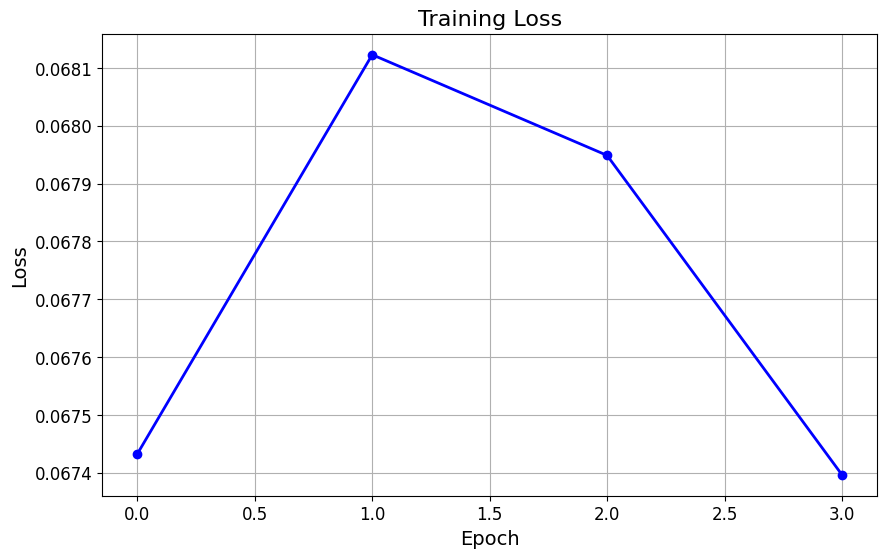

In [82]:
import matplotlib.pyplot as plt

# Plot the loss values
plt.figure(figsize=(10, 6))  # Set the figure size
plt.plot(loss_values, marker='o', linestyle='-', color='b', linewidth=2, markersize=6)  # Set line style and marker
plt.xlabel('Epoch', fontsize=14)  # Set x-axis label and fontsize
plt.ylabel('Loss', fontsize=14)  # Set y-axis label and fontsize
plt.title('Training Loss', fontsize=16)  # Set plot title and fontsize
plt.grid(True)  # Enable grid
plt.tick_params(axis='both', which='major', labelsize=12)  # Set tick label size
plt.show()

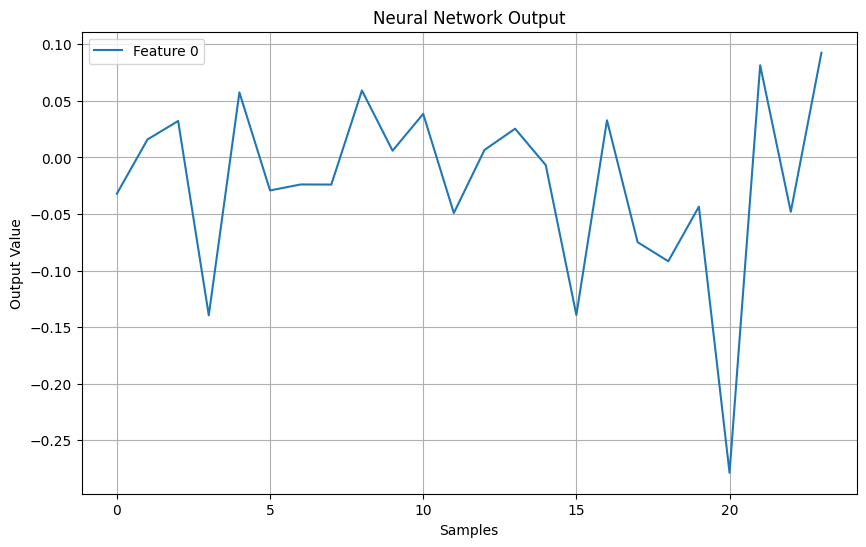

In [75]:
import matplotlib.pyplot as plt
import numpy as np

# Define a function to visualize the output of the neural network
def visualize_output(output):
    # Assuming output is a tensor of shape (batch_size, num_features)

    # Convert the tensor to a numpy array
    output_np = output.detach().numpy()

    # Plot the output features
    plt.figure(figsize=(10, 6))
    plt.plot(output_np.T)
    plt.xlabel('Samples')
    plt.ylabel('Output Value')
    plt.title('Neural Network Output')
    plt.legend([f'Feature {i}' for i in range(output_np.shape[1])])
    plt.grid(True)
    plt.show()

# Assuming you have the output tensor named 'output'
visualize_output(output)
